In [1]:
from random import sample
from dataset import CustomImageDataset

class1_examples = CustomImageDataset(sample(list(range(100)), k=3), load_embeddings=False)
class2_examples = CustomImageDataset(sample(list(range(100,200)), k=3), load_embeddings=False)
class3_examples = CustomImageDataset(sample(list(range(200,300)), k=3), load_embeddings=False)
class4_examples = CustomImageDataset(sample(list(range(300,400)), k=3), load_embeddings=False)

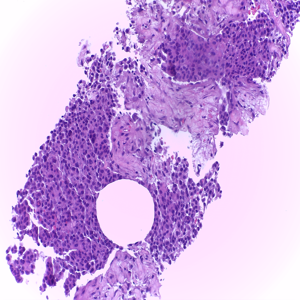

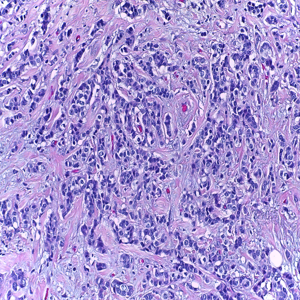

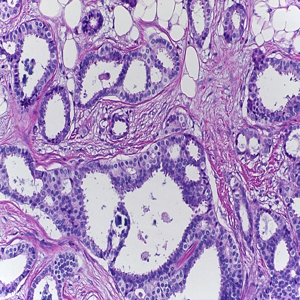

In [2]:
for x,_ in class1_examples:
    display(x.resize((300,300)))

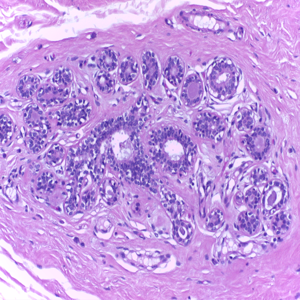

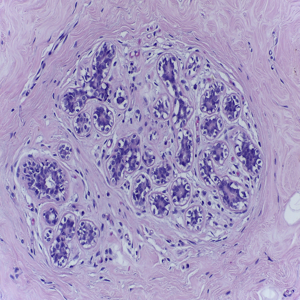

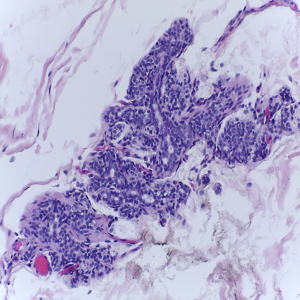

In [3]:
for x,_ in class2_examples:
    display(x.resize((300,300)))

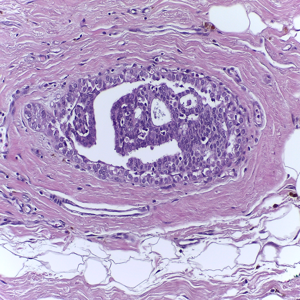

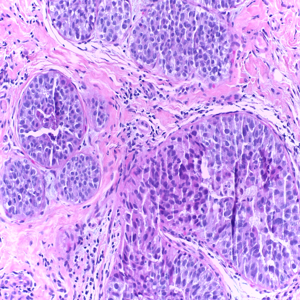

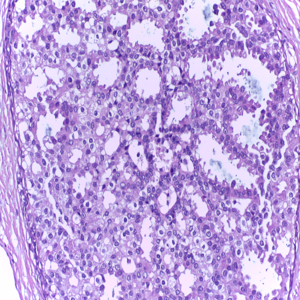

In [4]:
for x,_ in class3_examples:
    display(x.resize((300,300)))

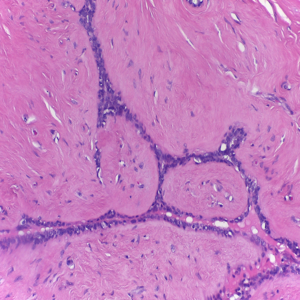

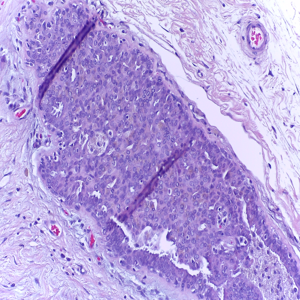

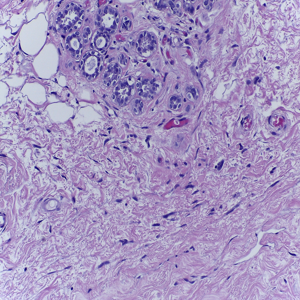

In [5]:
for x,_ in class4_examples:
    display(x.resize((300,300)))